Osnabrück University - Machine Learning (Summer Term 2021) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 09

## Introduction

This week's sheet should be solved and handed in before **2:00pm of Tuesday, June 22, 2021**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

The second half of this sheet will be a recap of previous topics, to help you prepare for the final exam (a second recap will follow on the last exercise sheet, that is sheet 12).

If you hit any question that should be discussed in more detail in the next practice session, please let us know.

## Assignment 0: Math recap (Conditional Probability) [0 Points]

This exercise is supposed to be very easy and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** Explain the idea of conditional probability. How is it defined?

Conditional probability explains the likelihood of an event given another event occurs. 

**b)** What is Bayes' theorem? What are its applications?

Bayes theoreom has a wide range of applications in statistics using the idea of venn-diagrams and for computing probabilities that depend on eachother. 

**c)** What does the law of total probability state? 

All probabilities must sum up to 1.

## Assignment 1: MLP and RBFN [10 Points]

This exercise is aimed at deepening the understanding of Radial Basis Function Networks and how they relate to Multilayer Perceptrons. Not all of the answers can be found directly in the slides - so when answering the (more algorithmic) questions, first take a minute and think about how you would go about solving them and if nothing comes to mind search the internet for a little bit. If you are interested in a real life application of both algorithms and how they compare take a look at this paper: [Comparison between Multi-Layer Perceptron and Radial Basis Function Networks for Sediment Load Estimation in a Tropical Watershed](http://file.scirp.org/pdf/JWARP20121000014_80441700.pdf)

![Schematic of a RBFN](RBFN.png)

We have prepared a little example that shows how radial basis function approximation works in Python. This is not an example implementation of a RBFN but illustrates the work of the hidden neurons.

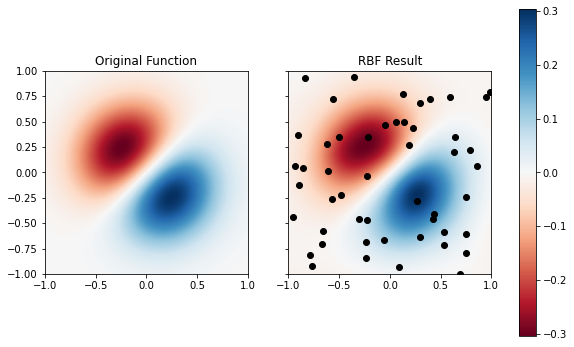

In [1]:
%matplotlib inline
import numpy as np
from numpy.random import uniform

from scipy.interpolate import Rbf

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm


def func(x, y):
    """
    This is the example function that should be fitted.
    Its shape could be described as two peaks close to
    each other - one going up, the other going down
    """
    return (x + y) * np.exp(-4.0 * (x**2 + y**2))


# number of training points (you may try different values here)
training_size = 50

# sample 'training_size' data points from the input space [-1,1]x[-1,1] ...
x = uniform(-1.0, 1.0, size=training_size)
y = uniform(-1.0, 1.0, size=training_size)

# ... and compute function values for them.
fvals = func(x, y)

# get the aprroximation via RBF
new_func = Rbf(x, y, fvals)


# Plot both functions:
# create a 100x100 grid of input values
x_grid, y_grid = np.mgrid[-1:1:100j, -1:1:100j]

fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(10, 6))
# This plot represents the original function
f_orig = func(x_grid, y_grid)
img = ax[0].imshow(f_orig, extent=[-1, 1, -1, 1], cmap='RdBu')
ax[0].set(title='Original Function')
# This plots the approximation of the original function by the RBF
# if the plot looks strange try to run it again, the sampling
# in the beginning is random
f_new = new_func(x_grid, y_grid)
plt.imshow(f_new, extent=[-1, 1, -1, 1], cmap='RdBu')
ax[1].set(title='RBF Result', xlim=[-1, 1], ylim=[-1, 1])
# scatter the datapoints that have been used by the RBF
plt.scatter(x, y, color='black')
fig.colorbar(img, ax=ax)
plt.show()

### Radial Basis Function Networks

#### What are radial basis functions?

Radial basis functions are neural networks, similar to MLP, that approximate functions by a linear combination of local approximations. 

#### What is the structure of a RBFN? You may also use the notion from the above included picture.

The structure of a RBFN is similar to the MLP. It consists of an input layer, a hidden layer and an output layer. Each neuron in the hidden layer consists of a radial basis function (Gaussian, etc.) 

#### How is a RBFN trained?

By updating the weights, similar to the perceptron weights update. 

### Comparison to the Multilayer Perceptron

#### What do both models have in common? Where do they differ?

Both models have similar structure, as said above, they consist of an input layer, a hidden layer and an output layer. They also both handle classification tasks, but maybe with different approaches, the MLP basically classifies the data using "hard boundaries", while the RBF uses "soft boundaries" or using certain gradients based on probabilities. The RBF's activation function is not a sigmoid, but usually a radial basis function like a Gaussian, and for the output, highly activated neurons contribute more. Because of these basis functions, the RBF requires more parameters for adaptaion, like the radius, the centers and the stepsize. For the MLP, the only intuitive parameters to change is the stepsize. As the network of neurons grows larger, the MLP is harder to understand or predict, since signals flow throught all neurons at each iteration, while in the RBF they might not.  

#### How can classification in both networks be visualized?

Classification can be visualized by common clustering examples ?

#### When would you use a RBFN instead of a Multilayer Perceptron?

Anywhere where the MLP would be acceptable, the RBF would be too. I would therefore always use the RBF's instead of a MLP, if i'm not dealing with a very design approach. 

## Recap 1: Concept Learning [2 Points]

### a) Concept Learning

What is Concept Learning? Is it supervised? Is it local?

Concept learning is about learning bigger concepts from specific examples. Yes, it is supervised since we feed the model positive and negative examples first. 

It is definitely not local since it takes into account all examples. 

### b) Find-S
Describe the Find-S Algorithm in pseudo code. What is its inductive bias? What are its advantages and drawbacks?

Initialize with the most specific hypothesis, for each positive example: if the hypothesis space does not entail this example, replace the hypothesis space by the next more general constraint. Repeat

The inductive bias means that the model can generalize from the training data. A model that would include every possible training example would not be biased. 

Advantages are that we can generalize with only few training examples, disatvantages are also those, the model can generalize not from the entire possible version space but "cherry picked" examples and not learn correctly or heavily biased. 

### c) Hypotheses space

What is the hypotheses space for Candidate-Elimination used in the lecture?

The hypothesis space is the space of all possible hypothesis (positive and negative examples, instances).

## Recap 2: Decision Trees [2 Points]

### a) Overfitting
What is overfitting? How can it be avoided?

Overfitting is done when the model is fit according to the training examples, instead of the other way around. This means that some trees could have a specific depth or cutoff location, which may favour the training phase in getting good precision results, but not in when using unseen data. 

### b) Pruning

Name one method for pruning a decision tree and describe it!

Reduced error pruning, cuts off the parts of the tree that containts nodes produced by noise to produce the smallest version while also the most accurate subtree. Therefore the tree achieves better generalization on unseen data. 

### c) Information gain
What are entropy and information gain? Provide explanation and formulae. How are they used in ID3?

Entropy is the measure of how dispersed the data is, an entropy of 1 means that the data is spread equally, for example in 10 positive and 10 negative examples. Information gain is the measure of how entropy affects how the tree is parsed. If we start with a node of high entropy, the information gain is high aswell, since we can separate data from the start, leaving a smaller tree to classify. They are used in ID3 to provide for the most efficient tree. 

I will not provide formulas. 

## Recap 3: Data Mining [2 Points]

### a) Missing values

How can you deal with missing values? Name an important algorithm and explain how to use it.

An important algorithm regarding missing values is the EM algorithm, where we sample datapoints from distributions. In this case, missing values can be filled in with sampled data of most likelihood. 

### b) Outliers

What are outliers? Can we detect them? If so, how?

Outliers are points in the data that exist due to several types of errors, or could also be natural and causes of high variance. While computing, outliers can mess with our computed means, by dragging them to the outlier and providing a insincere result. We can detect them using outlier-detection by computing certain z-values using STD and eliminating them past a certain value. 

### c) Expectation Maximization
What does the Q-function express in the EM algorithm?

YOUR ANSWER HERE

## Recap 4: Clustering [4 Points]

### a) Clustering

Explain the difference between single-linkage and complete-linkage clustering.

Simple linkage clustering refers to the clustering done by the minimal distance points of clusters, while complete linkage clustering refers to the clustering done by the maximal distance of minimal cluster points (Niko can explain this better). 

### b) Metrics

Name three different distance measures and briefly explain them. Check the metric axioms for one of them.

3 distance measures: 

- Minimum distance

Connect the distance of the points of each cluster that is the most near to one another

- Maximum distance

Connect the distance of the points of each cluster that is most far away, but still in the clusters

- Distance of centers

Compute the centers of each cluter and compute the distance from there


Wtf are metric axioms?

### c) Mixture models

What is a mixture model? Explain. Can you provide a formula?

YOUR ANSWER HERE

## Recap 5: Dimension Reduction [2 Points]

### a) Visualization

Name three different data visualization techniques to visualize high dimensional data. Explain one in detail.

Visualizing high-dimensional data can be done with: 

- PCA

In this technique, multidimensional data is mapped onto (most likely) 2 dimensions. For all features, the covariance matrix is computed and the features with the largest eigenvalue (most variance) are shown in the graph, and also using arrows to show the direction of the vectors. 

- Scatterplots
- Glyphs
- Chernoff faces

### b) PCA

Draw a few data points (ASCII arts or on a sheet of paper) and mark the principal components. What are the principal components?

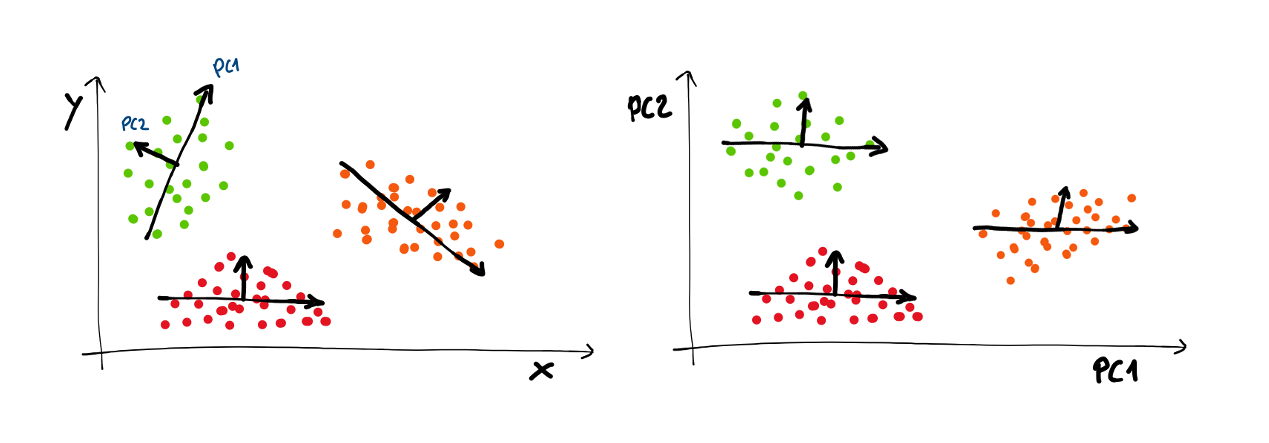

The principal components are the parts of highest variance in the data, this gives us an intuition on how the data is spread out and in what direction. 

### c) Covariance matrix
What does a covariance matrix express? How is it computed from data? How is it used in PCA?

The covariance matrix expresses the relation between features. On the diagonal, we have the variances of the features and on the rest of the matrix are the covariances between each features. It is used in PCA to find the largest eigenvalues after completing the characteristic polynomial for the eigenvectors of that matrix. After getting the list of eingevalues, choose the first largest (the ones that would give more information about the data) and map them onto a simple plot. 